In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [23]:
poke = pd.read_csv(r'pokemon.csv')
poke.head(7)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


In [24]:
poke.shape

(800, 13)

In [25]:
poke.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [26]:
poke.drop(['#'], axis=1, inplace=True)

In [27]:
poke.head()
poke['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [28]:
poke['Type 1'].unique()
m = poke[poke.Legendary == True]
m.groupby('Generation').Generation.value_counts()

Generation  Generation
1           1              6
2           2              5
3           3             18
4           4             13
5           5             15
6           6              8
Name: Generation, dtype: int64

In [29]:
poke.ability = poke['Type 1'].str.cat(poke['Type 2'], sep =" + ")
poke[(poke['Type 1'] == 'Psychic') & (poke['Type 2'] == 'Flying')].shape[0]

<ipython-input-29-2b872ad7a794>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  poke.ability = poke['Type 1'].str.cat(poke['Type 2'], sep =" + ")


6

In [30]:
c = poke.Name.str.contains('Mega')
poke[c].shape[0]

49

In [31]:
round(poke['Sp. Def'].std(),3)

27.829

In [32]:
tot_poke = poke.shape[0]
leg_poke = poke[(poke.Legendary == True)].shape[0]
percent_leg_poke = (leg_poke/tot_poke)*100
percent_leg_poke

8.125

In [33]:
max_def = poke.Defense.max()
poke[poke.Defense == max_def].Name

224    SteelixMega Steelix
230                Shuckle
333      AggronMega Aggron
Name: Name, dtype: object

In [37]:
pois_max_def = poke[(poke['Type 1'] == 'Poison') | (poke['Type 2'] == 'Poison')]
maxm = pois_max_def.Attack.max()

pois_max_def[pois_max_def.Attack == maxm]

poke.nlargest(5,'Attack')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


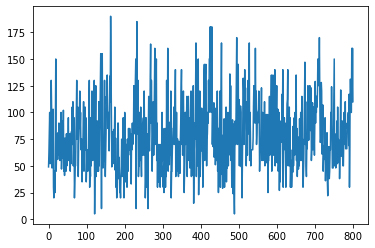

In [19]:
plt.plot(poke.Attack)
plt.show()

In [25]:
poke[poke.Name == 'VenusaurMega Venusaur']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


In [18]:
type_bool = (poke['Type 1'] == 'Ghost') | (poke['Type 2'] == 'Ghost')
m = (poke.Legendary == False) & (type_bool)
poke[(m) & (poke.Generation == 4)].sort_values('Speed',ascending = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
530,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
477,Mismagius,Ghost,NaN,495,60,60,60,105,105,105,4,False
531,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
473,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
472,Drifloon,Ghost,Flying,348,90,50,34,60,44,70,4,False
529,Dusknoir,Ghost,NaN,525,45,100,135,65,135,45,4,False
490,Spiritomb,Ghost,Dark,485,50,92,108,92,108,35,4,False


In [19]:
cdef = poke[poke.Name == 'Charizard'].Defense.max()
catt = poke[poke.Name == 'Charizard'].Attack.max()

c_att_deff = poke[(poke.Attack < catt) & (poke.Defense > cdef)]
c_att_deff[c_att_deff.Legendary == False].shape[0]

116

In [25]:
poke.head(30)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
